In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', 100)

In [4]:
df = pd.read_csv(r'data\train.csv')

In [5]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
df.shape

(103904, 25)

In [7]:
df.drop(['Unnamed: 0','id'],axis = 1, inplace = True)

In [8]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [9]:
len(df.columns)

23

In [10]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

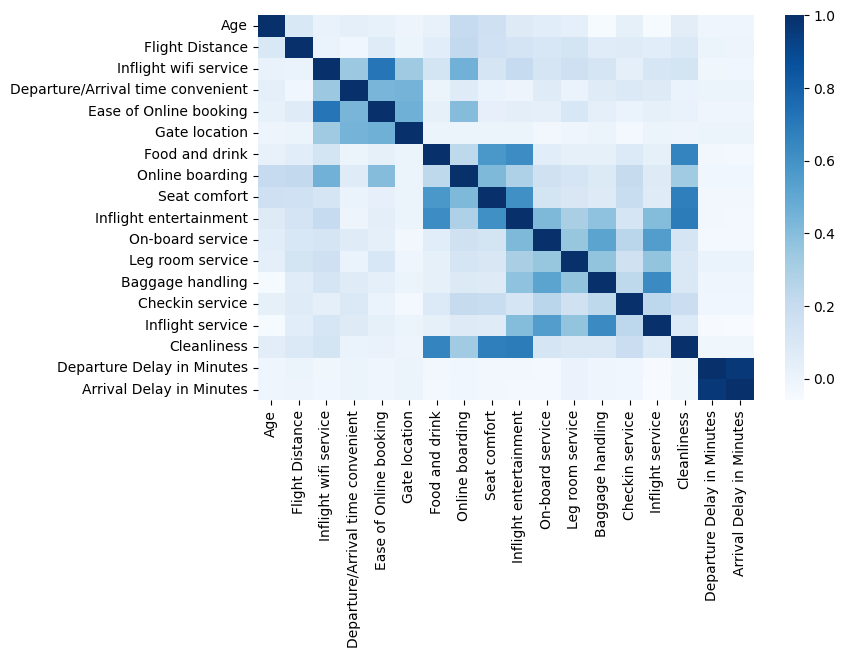

In [12]:
numeric_df = df.select_dtypes(include = 'number')
corr = numeric_df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr,cmap = 'Blues')
plt.show()

In [13]:
# Dearture Delay and Arrival Delay : highly positively correlated -- if a flight departs late then it is likely to arrive late as well

In [14]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


#### Insights
###### Arrival Delay Column:
 * The minimum arrival delay is 0 (indicating no delay).
 * The maximum arrival delay is 1584.
###### Flight Distance Column:
 * The shortest flight distance in the dataset is 31.
 * The longest flight distance in the dataset is 4983.
###### Departure Delay Column:
 * The minimum departure delya is 0.
 * The maximum departure delay is 1592
###### Note
 * there appears to be outliers in the data as there is a significant difference between the third quartile(Q3) and the maximum value.

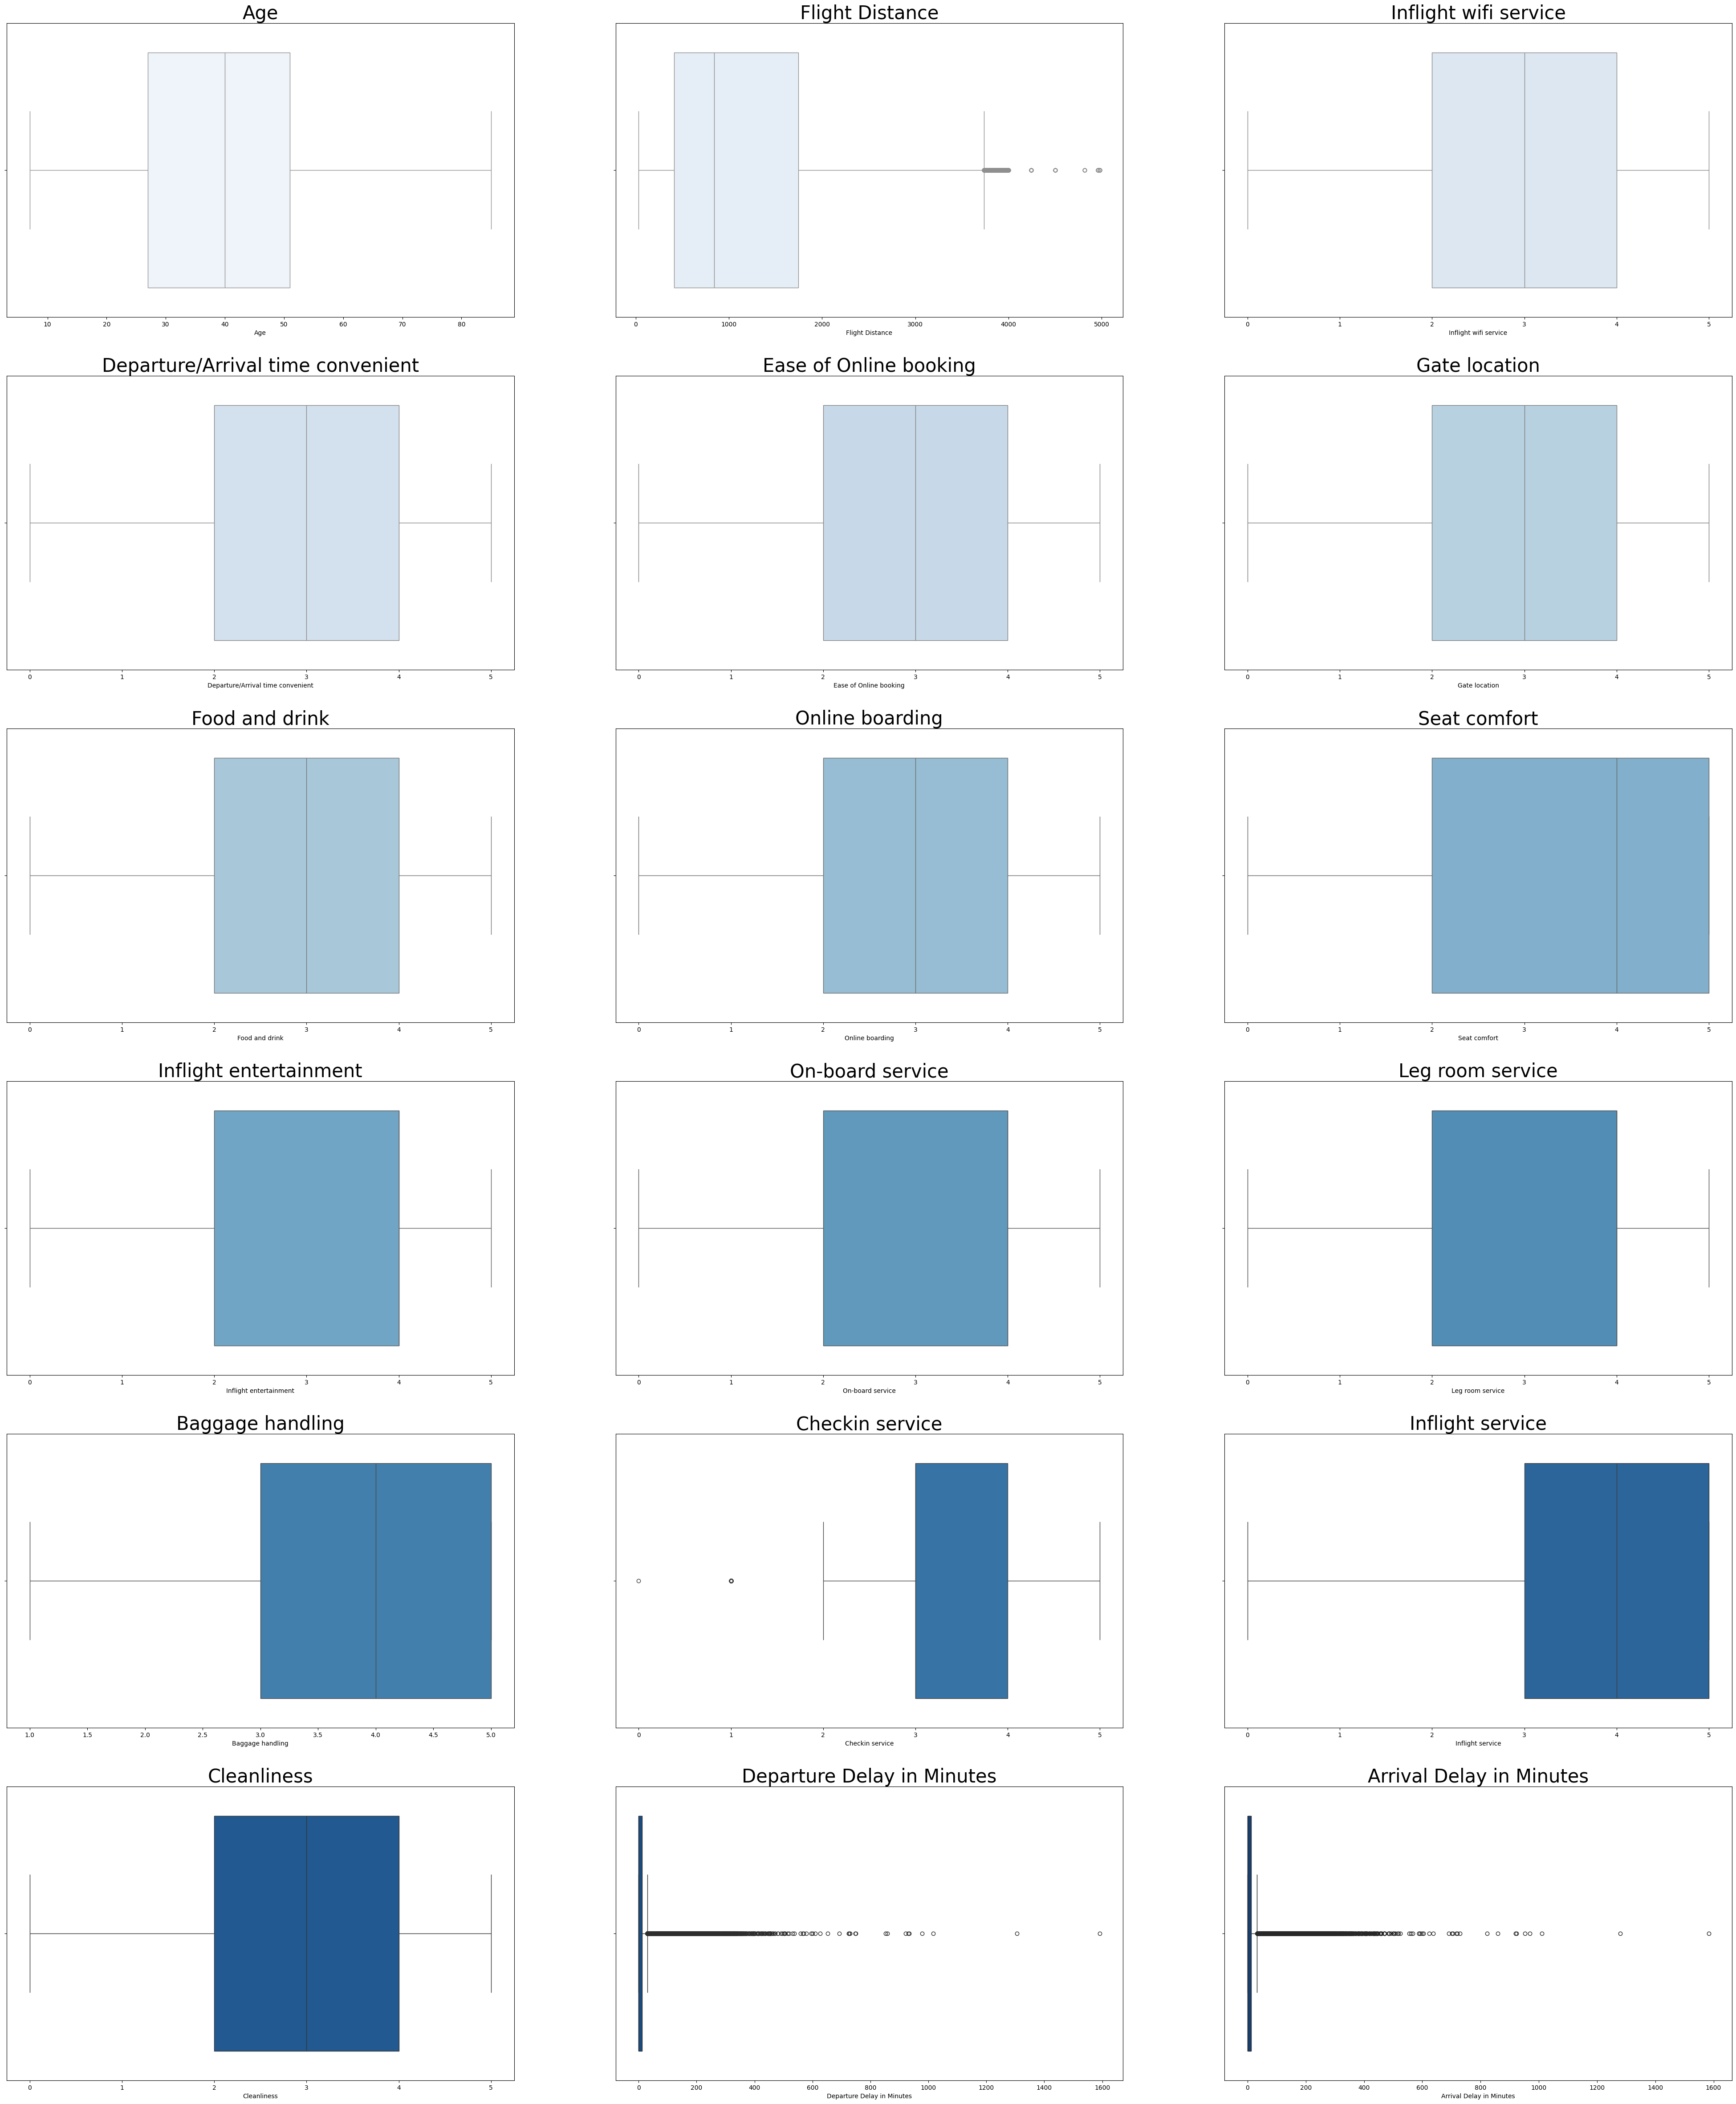

In [15]:
numerical = df.select_dtypes(include=['int','float'])
blue_palette = sns.color_palette('Blues', n_colors=len(numerical.columns))

fig,axes = plt.subplots(6,3, figsize=(50,60))
axes = axes.flatten()

for i, col in enumerate(numerical.columns):
    sns.boxplot(x=numerical[col], ax = axes[i], color = blue_palette[i])
    axes[i].set_title(col,fontsize=30)
plt.show()

In [16]:
### these columns have outliers:
# 1. Departure Delay 
# 2. Arrival Delay
# 3. Check-In service
# 4. Flight Distance

In [17]:
def handle_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = df[column].clip(lower = lower_bound, upper= upper_bound)
    return df

columns_to_handle = ['Departure Delay in Minutes','Arrival Delay in Minutes','Checkin service','Flight Distance']
df = handle_outliers(df,columns_to_handle)

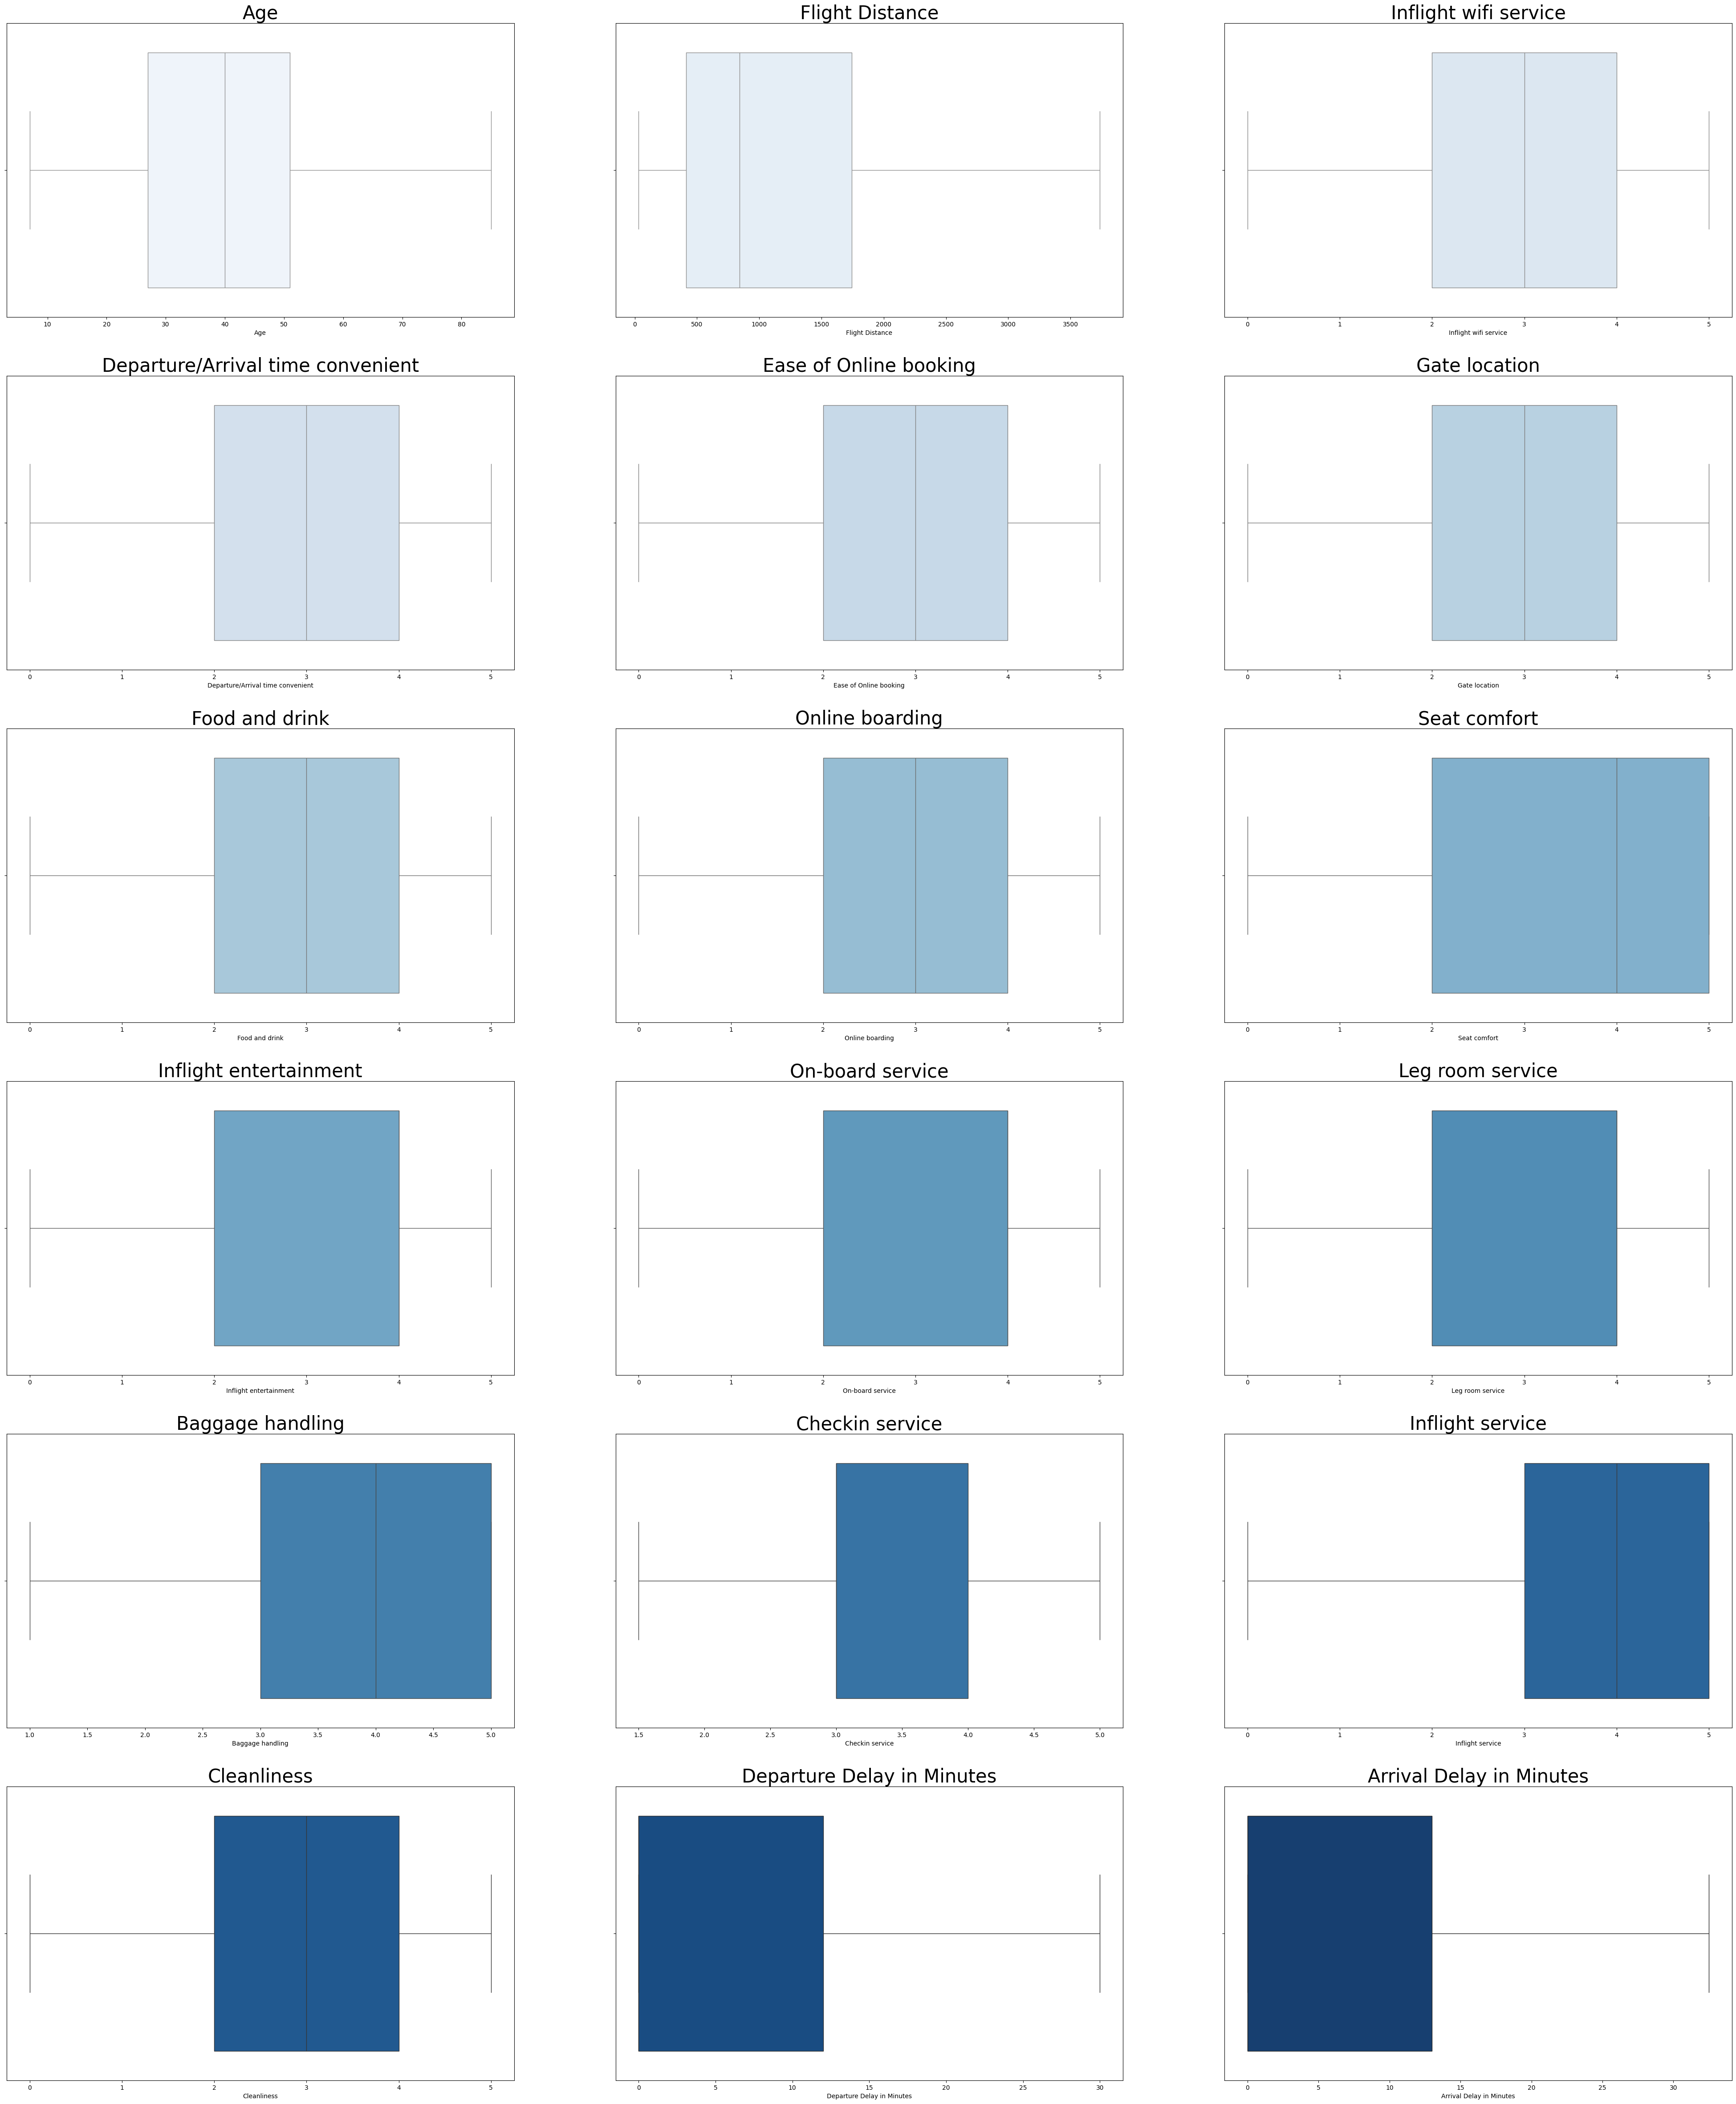

In [18]:
numerical = df.select_dtypes(include=['int','float'])
sns.color_palette('Blues', n_colors=len(numerical.columns))

fig,axes = plt.subplots(6,3, figsize=(50,60))
axes = axes.flatten()

for i, col in enumerate(numerical.columns):
    sns.boxplot(x=numerical[col], ax = axes[i], color = blue_palette[i])
    axes[i].set_title(col,fontsize=30)
plt.show()

In [19]:
# handled null values of 'arrival delay in minutes'
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median)

In [20]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## EDA

In [21]:
new_df = df.copy()

In [22]:
new_df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [23]:
columns_with_six_categories = new_df.columns[new_df.nunique() == 6]
columns_with_six_categories

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Inflight service',
       'Cleanliness'],
      dtype='object')

In [24]:
new_df['Cleanliness'].unique()

array([5, 1, 2, 3, 4, 0])

In [25]:
ordinal_mapping={
    0: 'Very Poor',
    1: 'Poor',
    2: 'Average',
    3: 'Good',
    4: 'Excellent',
    5: 'Outstanding'
}

In [26]:
new_df[columns_with_six_categories] = new_df[columns_with_six_categories].applymap(lambda x: ordinal_mapping.get(x,x) )

In [27]:
new_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,Good,Excellent,Good,Poor,Outstanding,Good,Outstanding,Outstanding,Excellent,Good,4,4.0,Outstanding,Outstanding,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235.0,Good,Average,Good,Good,Poor,Good,Poor,Poor,Poor,Outstanding,3,1.5,Excellent,Poor,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142.0,Average,Average,Average,Average,Outstanding,Outstanding,Outstanding,Outstanding,Excellent,Good,4,4.0,Excellent,Outstanding,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562.0,Average,Outstanding,Outstanding,Outstanding,Average,Average,Average,Average,Average,Outstanding,3,1.5,Excellent,Average,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214.0,Good,Good,Good,Good,Excellent,Outstanding,Outstanding,Good,Good,Excellent,4,3.0,Good,Good,0,0.0,satisfied


In [28]:
new_df['Baggage handling'].unique()

array([4, 3, 5, 1, 2])

In [29]:
mapping = {
    1: 'Very Poor',
    2: 'Poor',
    3: 'Average',
    4: 'Good',
    5: 'Excellent'
}
new_df['Baggage handling']=new_df['Baggage handling'].apply(lambda x: mapping.get(x,x))

In [30]:
new_df['Baggage handling'].unique()

array(['Good', 'Average', 'Excellent', 'Very Poor', 'Poor'], dtype=object)

In [31]:
new_df['Checkin service'].unique()

array([4. , 1.5, 3. , 5. , 2. ])

In [32]:
mapping = {
    1.5: 'Very Poor',
    2.0: 'Poor',
    3.0: 'Average',
    4.0: 'Good',
    5.0: 'Excellent'
}
new_df['Checkin service'] = new_df['Checkin service'].apply(lambda x: mapping.get(x,x))

In [33]:
new_df['Checkin service'].unique()

array(['Good', 'Very Poor', 'Average', 'Excellent', 'Poor'], dtype=object)

In [34]:
new_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,Good,Excellent,Good,Poor,Outstanding,Good,Outstanding,Outstanding,Excellent,Good,Good,Good,Outstanding,Outstanding,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235.0,Good,Average,Good,Good,Poor,Good,Poor,Poor,Poor,Outstanding,Average,Very Poor,Excellent,Poor,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142.0,Average,Average,Average,Average,Outstanding,Outstanding,Outstanding,Outstanding,Excellent,Good,Good,Good,Excellent,Outstanding,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562.0,Average,Outstanding,Outstanding,Outstanding,Average,Average,Average,Average,Average,Outstanding,Average,Very Poor,Excellent,Average,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214.0,Good,Good,Good,Good,Excellent,Outstanding,Outstanding,Good,Good,Excellent,Good,Average,Good,Good,0,0.0,satisfied


In [35]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

## Univariate EDA

In [36]:
numerical_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 
                       'Inflight wifi service', 'Departure/Arrival time convenient', 
                       'Ease of Online booking', 'Gate location', 'Food and drink', 
                       'Online boarding', 'Seat comfort', 'Inflight entertainment', 
                       'On-board service', 'Leg room service', 'Baggage handling', 
                       'Checkin service', 'Inflight service', 'Cleanliness']

In [37]:
# check for non numeric values in numerric columns
for col in numerical_columns:
    non_numeric_values = pd.to_numeric(df[col], errors='coerce').isna().sum()
    if non_numeric_values > 0:
        print(f"{col} contains {non_numeric_values} non-numeric values")

Arrival Delay in Minutes contains 310 non-numeric values


In [38]:
# convertion of non numeric values in 'Arrival Delay in minutes' to NaN
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# convertion of NaN values to numeric
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

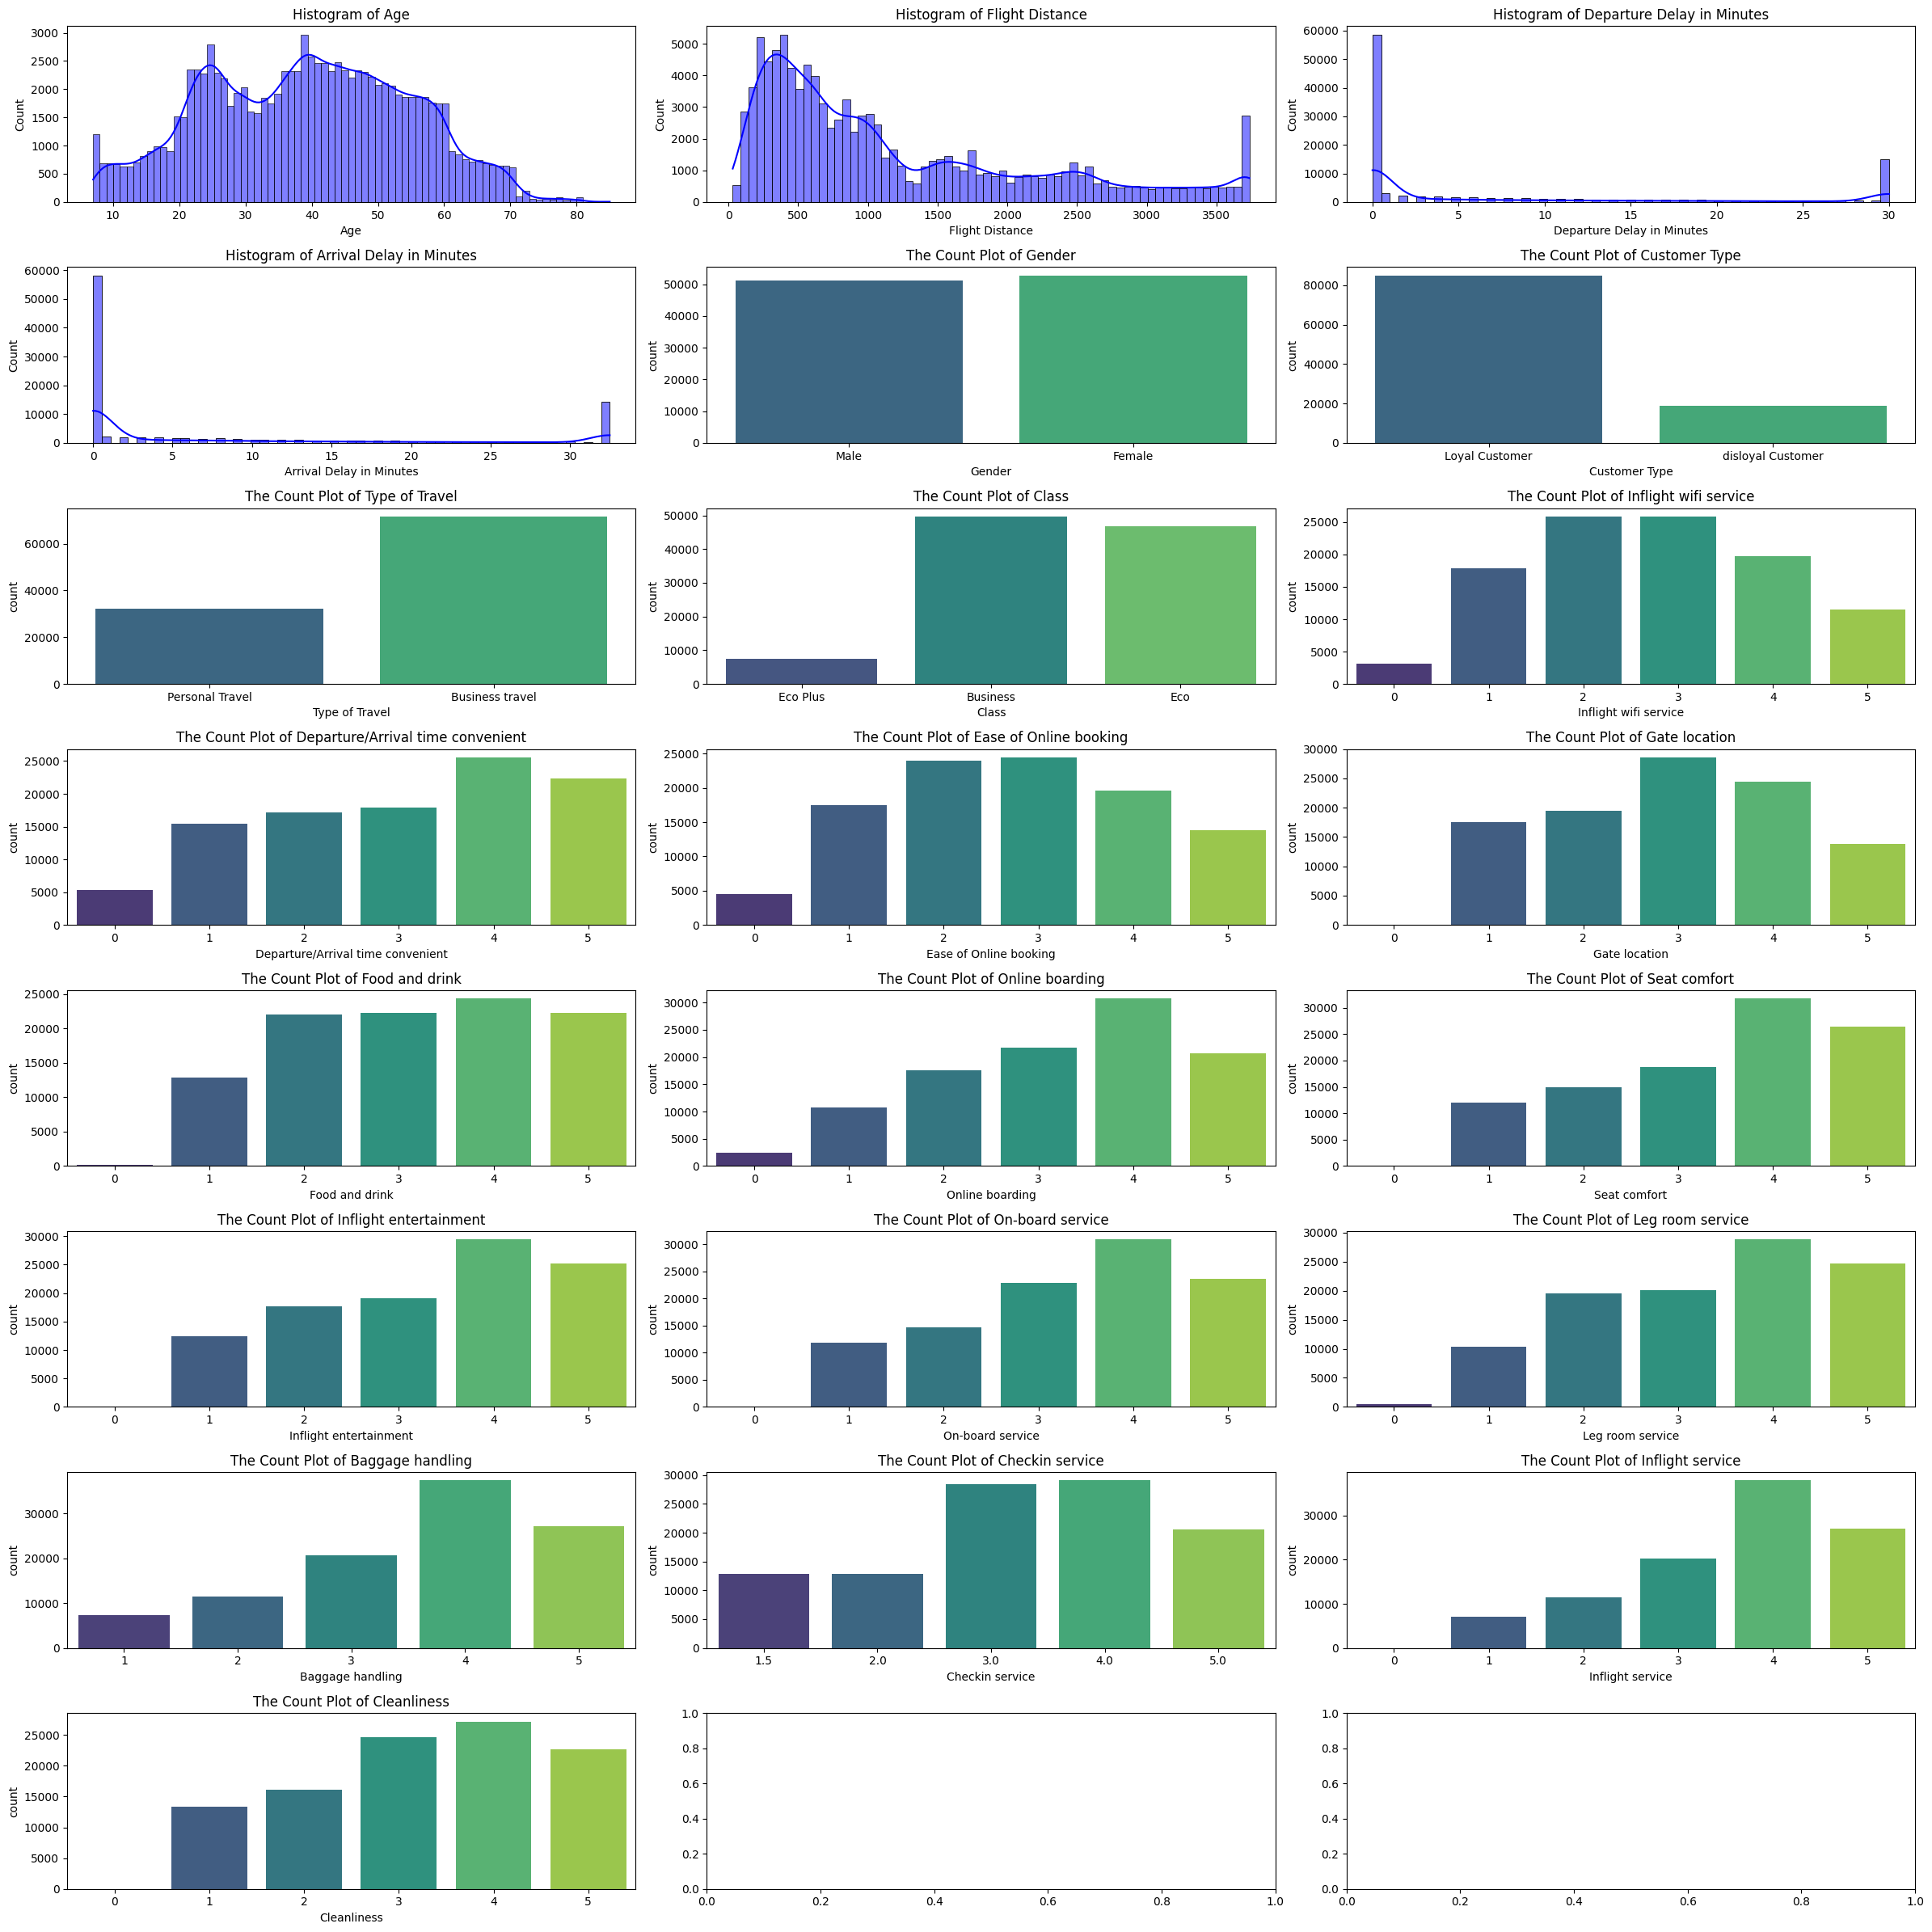

In [39]:
fig, axes = plt.subplots(nrows = 8, ncols=3, figsize=(24,24))
axes = axes.flatten()

# histogram for numerical features
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col],ax=axes[i],kde = True, color = 'blue')
    axes[i].set_title(f'Histogram of {col}')

# count plot for categorical features
for j, col in enumerate(categorical_columns):
    if i + 1 + j < len(axes):
        sns.countplot(x=df[col],ax=axes[i+1+j], palette = 'viridis')
        axes[i+1+j].set_title(f'The Count Plot of {col}')

plt.tight_layout()
plt.show()

# Bivariate EDA

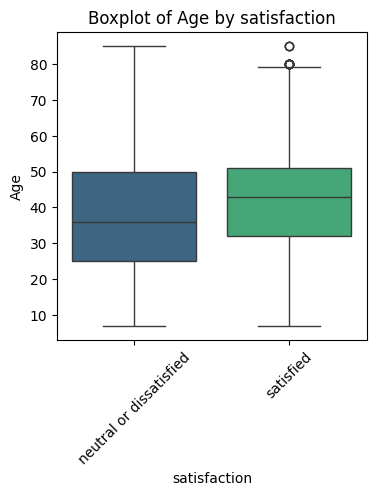

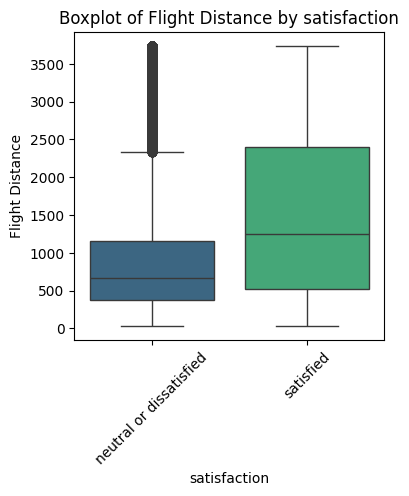

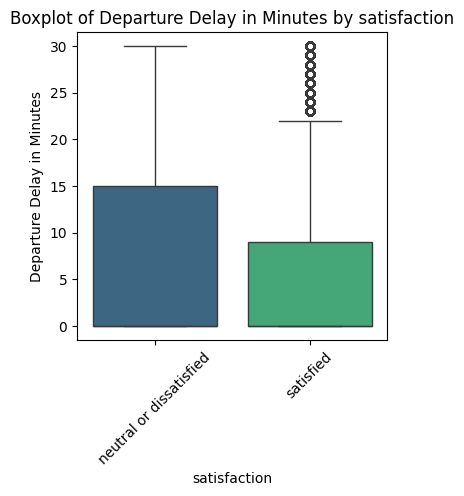

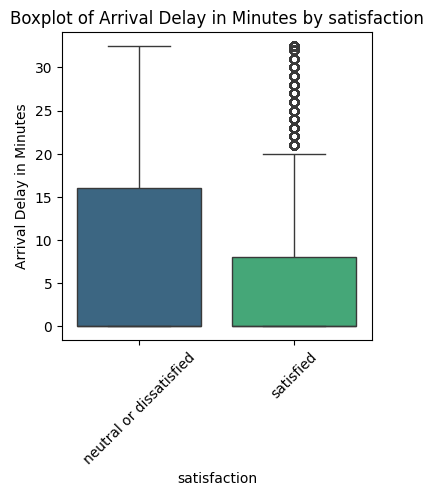

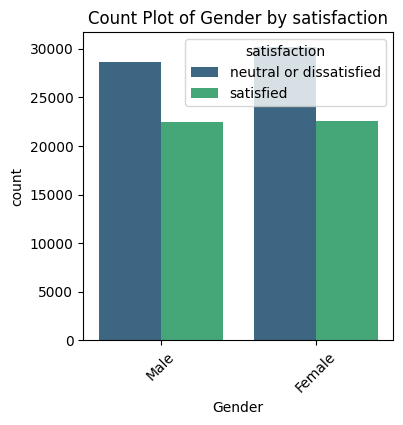

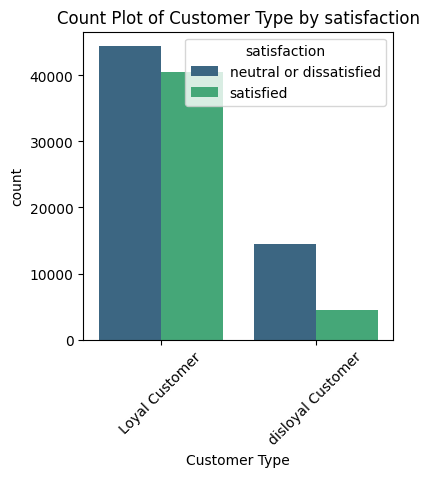

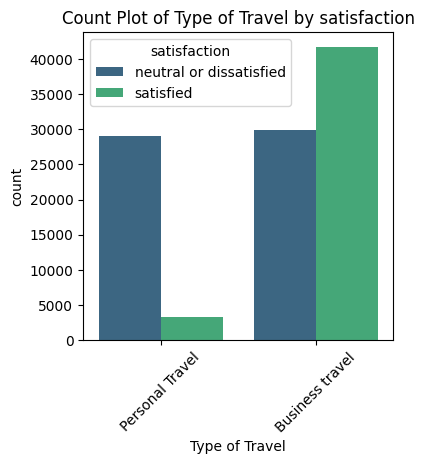

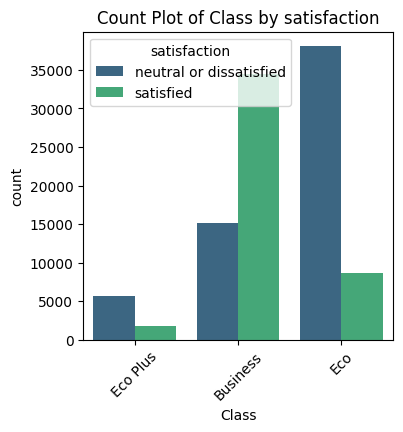

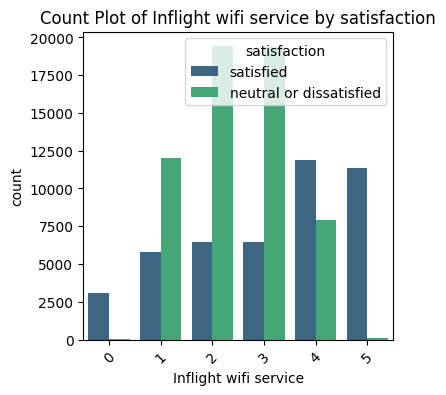

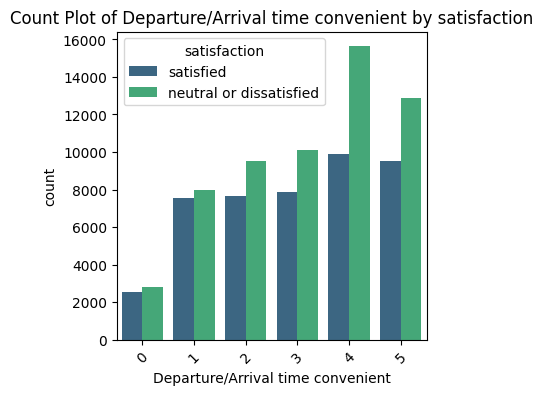

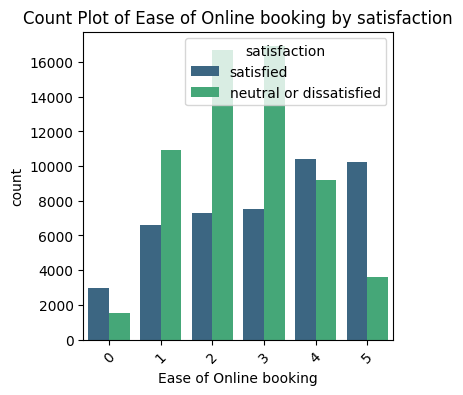

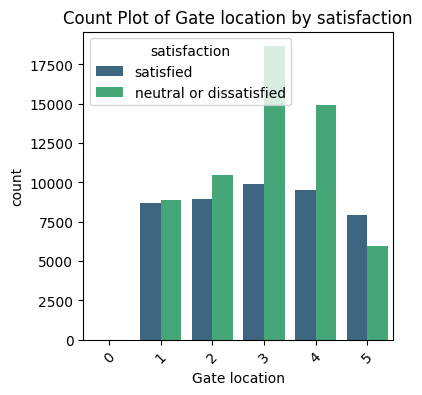

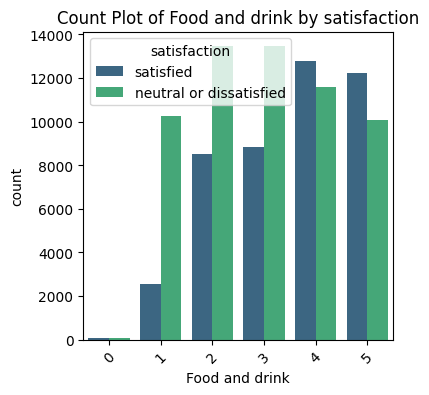

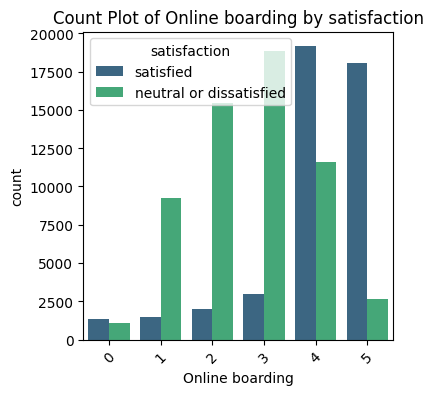

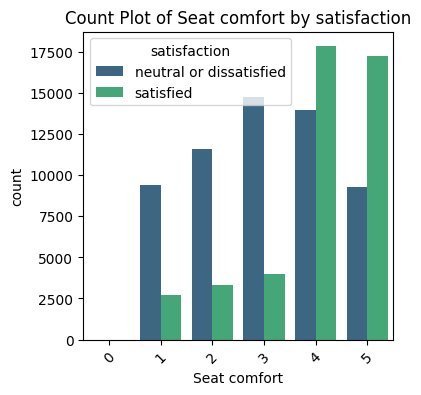

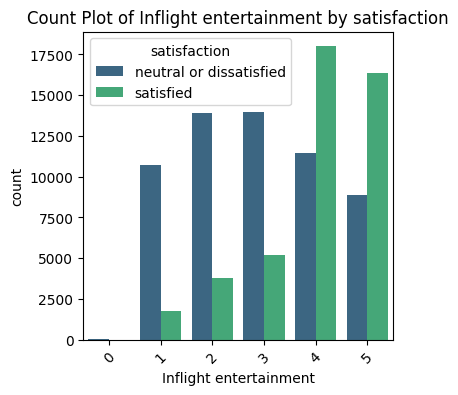

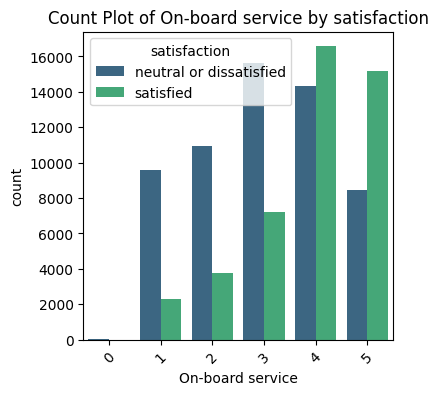

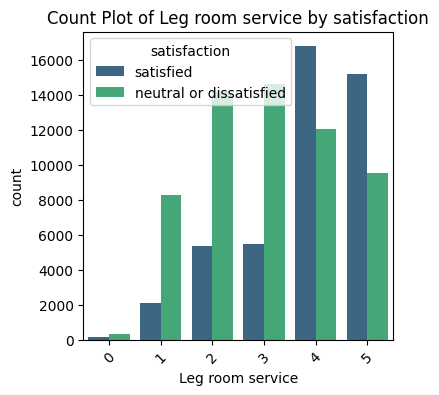

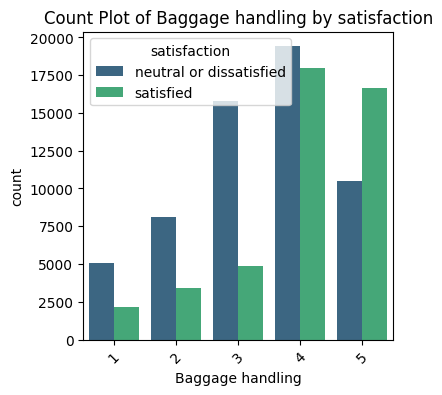

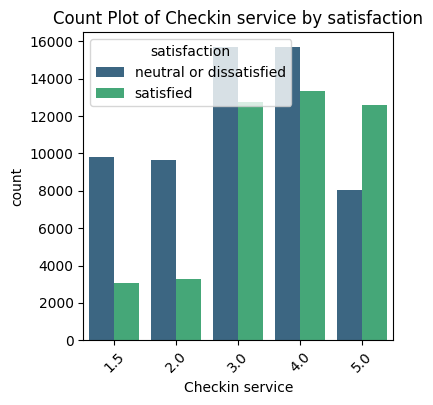

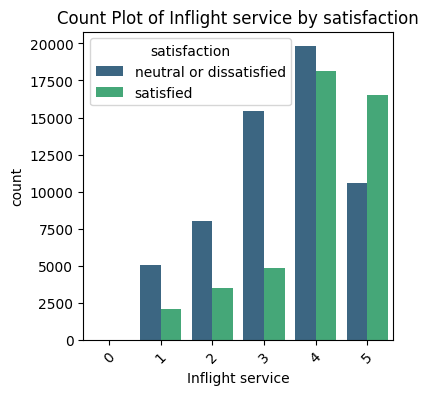

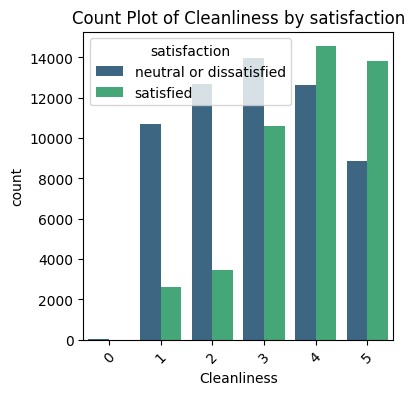

In [40]:
target_column = 'satisfaction'
# Numerical vs. Target Column
for col in numerical_columns:
    plt.figure(figsize=(4, 4))
    sns.boxplot(x=df[target_column], y=df[col], palette='viridis')
    plt.title(f'Boxplot of {col} by {target_column}')
    plt.xticks(rotation=45)
    plt.show()

# Categorical vs. target Column
for col in categorical_columns:
    plt.figure(figsize=(4, 4))
    sns.countplot(x=df[col], hue=df[target_column], palette='viridis')
    plt.title(f'Count Plot of {col} by {target_column}')
    plt.xticks(rotation=45)
    plt.show()

# Multivarite EDA

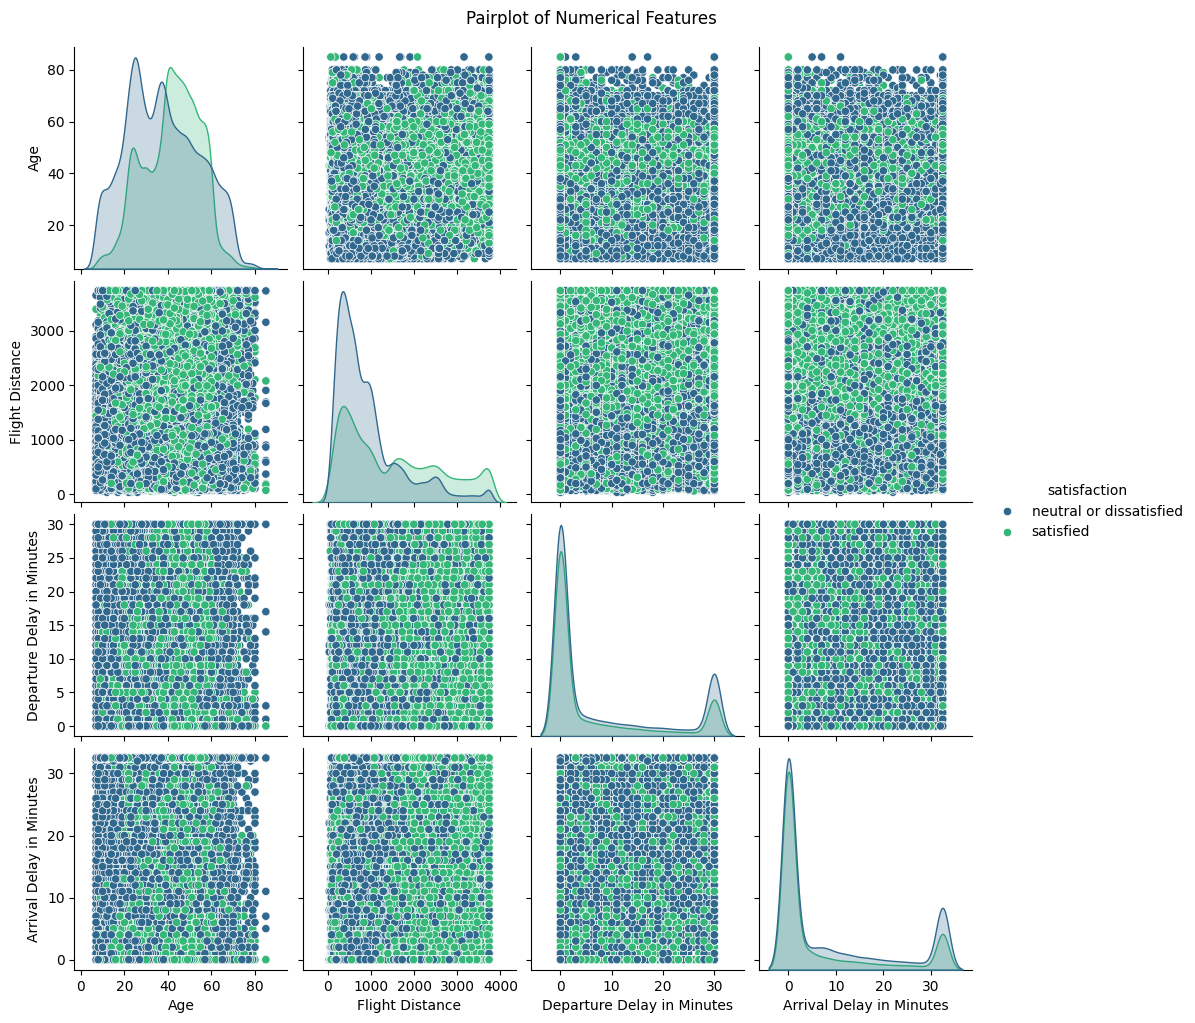

In [41]:
sns.pairplot(df[numerical_columns + [target_column]], hue=target_column, palette='viridis')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

# Important Insights
* Majority of people who travel are from Age-group 20-40 . This age group is of youngsters like students , working professionals , tourists , buisness man, etc.
* Most of people only tavel for upto 1000km distance. As only tourist people travel for long distances.
* Most of flights are not delayed but if they are delayed they are delayed for more than 30 minutes.Gnerally flights are delayed due to extreme weather conditions and if weather is bad it generally remains bad for quite a time.
* Females travel slightly more than Males.
* Most of flight customers are loyal which means they have taken thsi flight previously too.
* Most of people travel for buisness purposes.
* Most people travel in Buisness and Eco Class . Eco Plus price is generally between these two classes and just offfers some basic amenities like leg-room , etc which many people dont find valuable enough.
* Flight wifi service is average . They should make it better.
* They should focus on their online booking technolgy as people are facing problem due to this.
* Seat Comfort and Inflight service is also not that good.

# Feature Engineering

In [42]:
# Feature Construction
df['Total Delay'] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']

In [43]:
df['Delay Ratio'] = df['Total Delay']/(df['Flight Distance'] + 1)

In [44]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay,Delay Ratio
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3,4,3,1,5,3,5,5,4,3,4,4.0,5,5,25,18.0,neutral or dissatisfied,43.0,0.093275
1,Male,disloyal Customer,25,Business travel,Business,235.0,3,2,3,3,1,3,1,1,1,5,3,1.5,4,1,1,6.0,neutral or dissatisfied,7.0,0.029661
2,Female,Loyal Customer,26,Business travel,Business,1142.0,2,2,2,2,5,5,5,5,4,3,4,4.0,4,5,0,0.0,satisfied,0.0,0.000000
3,Female,Loyal Customer,25,Business travel,Business,562.0,2,5,5,5,2,2,2,2,2,5,3,1.5,4,2,11,9.0,neutral or dissatisfied,20.0,0.035524
4,Male,Loyal Customer,61,Business travel,Business,214.0,3,3,3,3,4,5,5,3,3,4,4,3.0,3,3,0,0.0,satisfied,0.0,0.000000


In [45]:
# Converted the Age using Binning
df['Age Group'] = pd.cut(df['Age'],bins=[0,18,30,50,100],labels=['Child','Youngster','Adult','Senior'])

In [46]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay,Delay Ratio,Age Group
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3,4,3,1,5,3,5,5,4,3,4,4.0,5,5,25,18.0,neutral or dissatisfied,43.0,0.093275,Child
1,Male,disloyal Customer,25,Business travel,Business,235.0,3,2,3,3,1,3,1,1,1,5,3,1.5,4,1,1,6.0,neutral or dissatisfied,7.0,0.029661,Youngster
2,Female,Loyal Customer,26,Business travel,Business,1142.0,2,2,2,2,5,5,5,5,4,3,4,4.0,4,5,0,0.0,satisfied,0.0,0.000000,Youngster
3,Female,Loyal Customer,25,Business travel,Business,562.0,2,5,5,5,2,2,2,2,2,5,3,1.5,4,2,11,9.0,neutral or dissatisfied,20.0,0.035524,Youngster
4,Male,Loyal Customer,61,Business travel,Business,214.0,3,3,3,3,4,5,5,3,3,4,4,3.0,3,3,0,0.0,satisfied,0.0,0.000000,Senior


In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns_to_encounter = ['Gender','Customer Type','Type of Travel','satisfaction','Class','Age Group']
label_mappings = {}

for col in columns_to_encounter:
    df[col] = le.fit_transform(df[col])
    label_mappings[col] = dict(zip(le.classes_,le.transform(le.classes_)))

for col, mapping in label_mappings.items():
    print(f'Mapping for {col}: {mapping}')

Mapping for Gender: {'Female': np.int64(0), 'Male': np.int64(1)}
Mapping for Customer Type: {'Loyal Customer': np.int64(0), 'disloyal Customer': np.int64(1)}
Mapping for Type of Travel: {'Business travel': np.int64(0), 'Personal Travel': np.int64(1)}
Mapping for satisfaction: {'neutral or dissatisfied': np.int64(0), 'satisfied': np.int64(1)}
Mapping for Class: {'Business': np.int64(0), 'Eco': np.int64(1), 'Eco Plus': np.int64(2)}
Mapping for Age Group: {'Adult': np.int64(0), 'Child': np.int64(1), 'Senior': np.int64(2), 'Youngster': np.int64(3)}


In [48]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay,Delay Ratio,Age Group
0,1,0,13,1,2,460.0,3,4,3,1,5,3,5,5,4,3,4,4.0,5,5,25,18.0,0,43.0,0.093275,1
1,1,1,25,0,0,235.0,3,2,3,3,1,3,1,1,1,5,3,1.5,4,1,1,6.0,0,7.0,0.029661,3
2,0,0,26,0,0,1142.0,2,2,2,2,5,5,5,5,4,3,4,4.0,4,5,0,0.0,1,0.0,0.000000,3
3,0,0,25,0,0,562.0,2,5,5,5,2,2,2,2,2,5,3,1.5,4,2,11,9.0,0,20.0,0.035524,3
4,1,0,61,0,0,214.0,3,3,3,3,4,5,5,3,3,4,4,3.0,3,3,0,0.0,1,0.0,0.000000,2


In [49]:
# Feature Selection

from sklearn.model_selection import train_test_split

X = df.drop('satisfaction', axis = 1)
y = df['satisfaction']

X_train, X_test,y_train,y_test = train_test_split(X,y, random_state = 42, test_size = 0.2)

In [50]:
from sklearn.feature_selection import mutual_info_classif

# calculated mutual information 
mutual_info = mutual_info_classif(X_train,y_train,discrete_features = True)

# created a dataframe for mutual information
mutual_info_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mutual_info
}).sort_values(by='Mutual Information',ascending=False)

print(mutual_info_df)


                              Feature  Mutual Information
11                    Online boarding            0.211611
23                        Delay Ratio            0.192154
6               Inflight wifi service            0.161543
4                               Class            0.134969
3                      Type of Travel            0.113675
13             Inflight entertainment            0.092882
5                     Flight Distance            0.084806
12                       Seat comfort            0.078537
15                   Leg room service            0.060404
14                   On-board service            0.057027
8              Ease of Online booking            0.051391
19                        Cleanliness            0.051153
2                                 Age            0.046413
16                   Baggage handling            0.042488
18                   Inflight service            0.040945
17                    Checkin service            0.031965
10            

In [51]:
top_features = mutual_info_df.head(12)['Feature'].tolist()
top_features

['Online boarding',
 'Delay Ratio',
 'Inflight wifi service',
 'Class',
 'Type of Travel',
 'Inflight entertainment',
 'Flight Distance',
 'Seat comfort',
 'Leg room service',
 'On-board service',
 'Ease of Online booking',
 'Cleanliness']

In [52]:
final_df = df[top_features + ['satisfaction']]

In [53]:
final_df.head(3)

,Online boarding,Delay Ratio,Inflight wifi service,Class,Type of Travel,Inflight entertainment,Flight Distance,Seat comfort,Leg room service,On-board service,Ease of Online booking,Cleanliness,satisfaction
0,3,0.093275,3,2,1,5,460.0,5,3,4,3,5,0
1,3,0.029661,3,0,0,1,235.0,1,5,1,3,1,0
2,5,0.000000,2,0,0,5,1142.0,5,3,4,2,5,1


In [54]:
# Checking of imbalanced data
final_df['satisfaction'].value_counts()

satisfaction
0    58879
1    45025
Name: count, dtype: int64

# Model Training

In [55]:
final_df.columns

Index(['Online boarding', 'Delay Ratio', 'Inflight wifi service', 'Class',
       'Type of Travel', 'Inflight entertainment', 'Flight Distance',
       'Seat comfort', 'Leg room service', 'On-board service',
       'Ease of Online booking', 'Cleanliness', 'satisfaction'],
      dtype='object')

In [56]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb

# Sample 10 % of the data
df_sample = final_df.sample(frac = 0.05, random_state = 42)

# Prepared the sample data
X_sample = final_df.drop(columns = 'satisfaction', axis = 1)
y_sample = final_df['satisfaction']


# Split the sample data
X_train_sample, X_test_sample,y_train_sample,y_test_sample = train_test_split(X_sample,y_sample, random_state = 42, test_size = 0.2)

# Initialized classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=50),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'Random Forest': RandomForestClassifier(n_estimators = 50, n_jobs = -1),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'LightGBM': lgb.LGBMClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric = 'mlogloss')
}

# Train and evaluated each classifier
results={}
for name, clf in classifiers.items():
    clf.fit(X_train_sample,y_train_sample)
    y_pred = clf.predict(X_test_sample)
    accuracy = accuracy_score(y_test_sample,y_pred)
    results[name] = accuracy

# print results
for name, accuracy in results.items():
    print(f'{name}: {accuracy:.4f}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 563
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350
Logistic Regression: 0.8210
Gradient Boosting: 0.9216
AdaBoost: 0.9101
Random Forest: 0.9428
Support Vector Classifier: 0.6652
K-Nearest Neighbors: 0.8616
Naive Bayes: 0.8528
Decision Tree: 0.9223
LightGBM: 0.9434
XGBoost: 0.9443


In [57]:
### LGBM is the best model for us 

In [58]:
### Makin of LGBM model

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,confusion_matrix
import lightgbm as lgb

In [60]:
X = final_df.drop(columns = 'satisfaction',axis =1)
y = final_df['satisfaction']

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [62]:
lgbm_model = lgb.LGBMClassifier()
lgbm_model.fit(X_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 563
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


LGBMClassifier()

In [63]:
y_pred = lgbm_model.predict(X_test)

In [64]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred, average='weighted')
recall = recall_score(y_test,y_pred,average='weighted')
f1 = f1_score(y_test,y_pred,average = 'weighted')

In [65]:
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9434
Precision: 0.9436
Recall: 0.9434
F1 Score: 0.9432


# Model Saving

In [66]:
import pickle
with open('lgbm_model.pkl', 'wb') as file:
    pickle.dump(lgbm_model,file)

# Model Loading and Testing

In [67]:
with open('lgbm_model.pkl','rb') as file:
    loaded_model = pickle.load(file)

In [68]:
X_train[30:32]

,Online boarding,Delay Ratio,Inflight wifi service,Class,Type of Travel,Inflight entertainment,Flight Distance,Seat comfort,Leg room service,On-board service,Ease of Online booking,Cleanliness
8585,4,0.001821,3,0,0,5,2744.0,5,5,5,3,5
55156,2,0.000000,2,1,0,2,109.0,3,2,2,3,3


In [69]:
y_train[30:32]

8585     1
55156    0
Name: satisfaction, dtype: int64

In [73]:
X_new = np.array([
    [0,	0,	0,	0,	1,	0,	1000.0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	1,	0,	1000.0,	0,	0,	0,	0,	0],
])

In [74]:
y_pred_new = loaded_model.predict(X_new)

In [75]:
print('Predictions:', y_pred_new)

Predictions: [1 1]
